# Approach
For this problem, we can use collaborative filtering to find similarity between movies. The solution we are going to utilize is K-Nearest Neighbour. 

# 1. Load the Data

In [1]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# Step 1: Read the data
data = pd.read_csv('/kaggle/input/movie-data/movies_dataset.csv')

# 2. Drop Missing Values

In [2]:
# Step 2: Drop missing values
data.dropna(inplace=True)

# 3. Prepare data

In [3]:
# Step 3: Prepare data
# Remove movie titles as they are not needed for KNN
X = data.drop(columns=['title'])

# Step 4: Train the KNN model
k = input("How many similar movies do you want recommendation for?")
k=int(k)
k+=1

How many similar movies do you want recommendation for? 3


# 4. Create the model 

In [4]:
knn_model = NearestNeighbors(n_neighbors=k, metric='cosine')  # Using cosine similarity
knn_model.fit(X)

NearestNeighbors(metric='cosine', n_neighbors=4)

# 5. Visualize the similarity
The following heatmap visualizes the similarity between all pairs of movies in the dataset. We can observe clusters of similar movies based on their cosine similarity values. This can help us understand the relationships between movies and how recommendations are generated based on their similarities

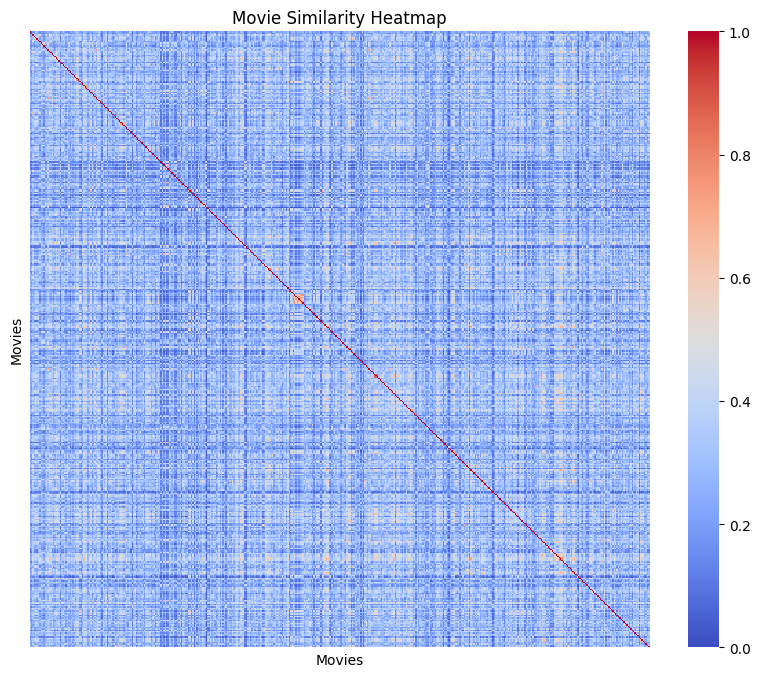

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate similarity matrix
similarity_matrix = cosine_similarity(X)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Movie Similarity Heatmap')
plt.xlabel('Movies')
plt.ylabel('Movies')
plt.show()


# 5. Get recommendations

In [6]:
# Step 5: Function to get recommendations
def get_recommendations(movie_title):
    movie_index = data[data['title'] == movie_title].index[0]  # Get index of the input movie
    distances, indices = knn_model.kneighbors([X.iloc[movie_index]])
    recommended_movies = [data['title'][i] for i in indices[0]]
    return recommended_movies

# Step 6: Take user input and get recommendations
user_input = "Abyss, The (1989)"
recommendations = get_recommendations(user_input)
print("Recommendations for", user_input, ":")
for movie in recommendations:
    if movie != user_input:  # Filter out the input movie
        print(movie)


Recommendations for Abyss, The (1989) :
Aliens (1986)
Planet of the Apes (1968)
Indiana Jones and the Temple of Doom (1984)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
